In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import string

In [2]:
df = pd.read_csv('electronics_final.csv', header = 0)

In [3]:
print('dataset dimensions are:', df.shape)
df.describe(include = 'all')



dataset dimensions are: (2006, 10)


,Product_code,Product_name,Product_description,Product_URL,Breadcrumb_parent,Breadcrumb_active,Product_price,Rating_Value,Rating_Count,Recommended_Prods
count,2006,2006,1640,2006,2006,2006,2006,2006.000000,2006,2006
unique,1968,1957,1569,1968,16,255,1077,NaN,370,1611
top,4655HRO97D87,"SAMSUNG 65"" Class 4K UHD (2160P) the Frame QLE...",Enter a world saturated with color and sharpen...,https://walmart.com/ip/4655HRO97D87,Electronics,/Digital SLR Cameras,$99.00,NaN,0 ratings,['Not available']
freq,5,5,6,5,1616,233,22,NaN,450,379
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.115105,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.838493,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.850000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.500000,NaN,NaN


In [4]:
df = df[df['Rating_Count'].map(len)>8]

In [5]:
df

,Product_code,Product_name,Product_description,Product_URL,Breadcrumb_parent,Breadcrumb_active,Product_price,Rating_Value,Rating_Count,Recommended_Prods
0,35X5YDKAGYGK,"RCA 50"" Class 4K Ultra HD (2160P) LED TV (RLDE...","The RCA 50"" 2160p Class 4K Ultra High-Definiti...",https://walmart.com/ip/35X5YDKAGYGK,Electronics,/All TVs,$219.99,3.9,1254 ratings,"['5YZBEUJO11MO', '1CFXZI1QNUKO', '6SA8LLNNSLMP..."
1,2RKSQC7C8QKZ,"RCA 55"" Class 4K Ultra HD (2160P) HDR Roku Sma...",Enjoying 4K Ultra HD just got easier. RCA Roku...,https://walmart.com/ip/2RKSQC7C8QKZ,Electronics,/All TVs,$279.99,4.2,595 ratings,"['1CFXZI1QNUKO', '2X3MQ9SM84AA', '6SA8LLNNSLMP..."
2,4U07UQJGM4NA,"LG 65"" Class 4K UHD 2160P Smart TV 65UN7300PUF...",Empower entertainment with LG UHD TV. LG's UHD...,https://walmart.com/ip/4U07UQJGM4NA,Electronics,/All TVs,$646.99,4.3,154 ratings,"['2MJRWZI33VET', '46VQULKOD37S', '2Z0G09Y8QKOL..."
3,75BV5KCCV6DE,"SAMSUNG 70"" Class 4K Crystal UHD (2160P) LED S...",This smart TV unlocks hidden detail at four ti...,https://walmart.com/ip/75BV5KCCV6DE,Electronics,/All TVs,$947.00,4.4,2843 ratings,"['46VQULKOD37S', '5NGD72QFL38K', '3YFRMHEUUEZD..."
4,7K3V50QQP6XT,"TCL 32"" Class 1080P FHD LED Roku Smart TV 3 Se...",The 3-Series TCL Roku TV puts all your enterta...,https://walmart.com/ip/7K3V50QQP6XT,Electronics,/All TVs,$149.99,4.4,208 ratings,"['2Z3IRIL1ATIA', '60R8ZDOQCUAS', '5HF3T8I5XH2A..."
...,...,...,...,...,...,...,...,...,...,...
2001,2GR4W5AW89OG,"Vankyo MatrixPad Z1 Kids 7 inch, 32GB ROM, Kid...",Vankyo MatrixPad Z1 Kids Made for fun Designed...,https://walmart.com/ip/2GR4W5AW89OG,Electronics,/Android Tablets for Kids,$69.99,4.6,16 ratings,"['23G4WOJHC0S8', '5RWM6EUJ1XMV', '6B670NL5Q1D1..."
2002,6LMSIJ3OTOY1,Cell Phone Holder Phone Stand for Desk Tablet ...,NaN,https://walmart.com/ip/6LMSIJ3OTOY1,Cell Phones,/All Phone Car Holders,$10.19,4.4,10 ratings,['Not available']
2003,3228PS39L547,Targus VersaVu Rotating Case for 9.7-inch iPad...,Whether you?re bringing your iPad to the offic...,https://walmart.com/ip/3228PS39L547,Electronics,"/iPad Cases, Sleeves & Bags",$14.66,4.8,12 ratings,"['1094OQH0XWCG', '17HS4ZS6T8UI', '1R69MYZQ4TD6..."
2004,62IWO2UXRKG7,Apple USB Home Travel Adapter/ Lightning Cable...,Apple USB Home Travel Charger Adapter/ Lightni...,https://walmart.com/ip/62IWO2UXRKG7,Cell Phones,/Apple Phone Chargers,$12.97,4.1,76 ratings,"['4CFBRDTTCHG0', '2UYU75A4276H', '64MDH00JKSBS..."


In [6]:
df = df.reset_index(drop = True)

In [7]:
#Let's take a smaller set of the data to speed up computations for this example
df_sample = df.iloc[:2002] 

In [8]:
df_sample.shape

(2001, 10)

In [9]:
rec_prods_ids = []
for i in range(len(df_sample.Product_code)):
    xx = df_sample.Recommended_Prods[i]
    for j in range(int(len(xx)/16)):
        rec_prods_ids.append(xx[16*j+2:16*j+14])

In [10]:
df_sample.Recommended_Prods[624]

"['Not available']"

In [11]:
pr_code = df_sample.Product_code

In [12]:
pr = []
for i in range(len(pr_code)):
    pr.append(pr_code[i])

In [13]:
a = set(rec_prods_ids) & set(pr)
len(a)

919

In [14]:
coef_mat = np.zeros((len(pr_code), len(pr_code)))
for i in range(len(pr_code)):
    rec_prods_ids_ind = []
    xx = df_sample.Recommended_Prods[i]
    for j in range(int(len(xx)/16)):
        rec_prods_ids_ind.append(xx[16*j+2:16*j+14])
    b = set(rec_prods_ids_ind) & set(a)
    if len(b)>0:
        both = set(pr).intersection(b)
        ind = [pr.index(x) for x in both]
        coef_mat[i,ind] = 1

In [19]:

nodes_labels = np.arange(2001)

In [20]:
nodes_labels.tolist()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [21]:
weighted_mat = np.zeros((len(pr_code), len(pr_code)))

In [22]:

for i in range(1):
    p_s = []
    npr = []
    p_r = []
    p_ratings = []
    BAR = np.zeros(len(pr_code))
    indx = [i for i, x in enumerate(coef_mat[:,i]) if x]
    print(indx)
    
    
    
    p_score = df.Rating_Value[indx]
    p_s = p_score.to_numpy()
    p_s = p_s.astype(float)
    p_ratings = df.Rating_Count[indx]
    p_r = p_ratings.to_numpy()
    new_p_r = [x[:-8] for x in p_r]
    npr = np.array(new_p_r)
    npr = np.nan_to_num(npr, copy = False).astype(np.int)
    npr = npr.astype(float)
    bar_temp = []
    
    
    bc_P = df.Breadcrumb_parent[indx]
    bc_P = bc_P.tolist()
    bc_P1 = df.Breadcrumb_parent[i]
    bc_P1 = [bc_P1]
    both1 = set(bc_P).intersection(bc_P1)
    ind = [bc_P.index(x) for x in both1]



    for k in range(len(p_s)):
        bar_temp.append((npr[k]*p_s[k])/(npr[k]+min(npr)) + min(npr)*np.mean(p_s)/(npr[k]+min(npr)))
    BAR[indx] = bar_temp
    coef_mat[i,:] = BAR
    
    



[17, 62, 124, 164, 226]


/Users/bhaskar/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


In [ ]:
bc_P = df.Breadcrumb_parent[indx]
bc_P = bc_P.tolist()
bc_P1 = df.Breadcrumb_parent[i]
bc_P1 = [bc_P1]
both1 = set(bc_P).intersection(bc_P1)
ind = [bc_P.index(x) for x in both1]


In [23]:
bc_P1

['Electronics']

In [24]:
bc_P

['Electronics', 'Electronics', 'Electronics', 'Electronics', 'Electronics']

In [25]:
ind

[0]

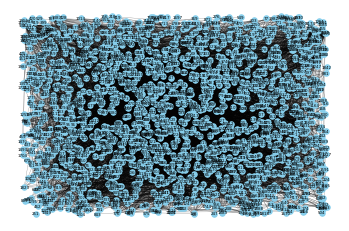

In [26]:
#Create Graph object using the weighted product matrix as adjacency matrix
G = nx.from_numpy_matrix(coef_mat)
pos=nx.random_layout(G)
labels = {}
for idx, node in enumerate(G.nodes()):
    labels[node] = nodes_labels[idx]

nx.draw_networkx_nodes(G, pos , node_color="skyblue", node_size=30)
nx.draw_networkx_edges(G, pos,  edge_color='k', width= 0.3, alpha= 0.5)
nx.draw_networkx_labels(G, pos, labels, font_size=4)
plt.axis('off')
plt.show() # display

In [27]:
#Export graph to Gephi
H=nx.relabel_nodes(G,labels) #create a new graph with Description labels and save to Gephi for visualizations
nx.write_gexf(H, "gr_elec.gexf")

In [ ]:
#Find communities of nodes (products)
partition = community_louvain.best_partition(G, resolution = 1.5)
values = list(partition.values())

In [ ]:
#Check how many communities were created
print('Number of communities:', len(np.unique(values)))

In [ ]:
#Create dataframe with product description and community id
products_communities = pd.DataFrame(nodes_labels, columns = ['product_description'])
products_communities['community_id'] = values

In [ ]:
#Lets take a peek at community 1
products_communities[products_communities['community_id']==1].head(15)